<a href="https://colab.research.google.com/github/zaki391/Discovery-and-Mapping-of-global-floodplain/blob/main/Discovery_and_Mapping_of_global_floodplain_z_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here we using two CSV file of flood area



In [ ]:
import numpy as np
import geopandas as gpd
import pandas as pd
#import rasterio
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import SelectKBest
!pip install catboost
from catboost import CatBoostRegressor

# Rest of the code remains the same







In [ ]:
data =  pd.read_csv("/content/drive/MyDrive/data set flood/s1_data.csv")
#data =  pd.read_csv("/content/drive/MyDrive/Copy of s2_data.csv")


By Using head function we extract the top values of dataset


In [ ]:
data.head(10)

geometry  label        date  \
0  [[[36.801563, -17.829673], [36.802546, -17.875...      0  2019-02-06   
1  [[[30.079766, -1.947669], [30.079851, -1.99392...      0  2018-12-19   
2  [[[-1.734277, 6.731243], [-1.734397, 6.684938]...      0  2018-12-17   
3  [[[146.754028, -19.184316], [146.753959, -19.2...      1  2019-02-11   
4  [[[48.748582, 30.637319], [48.749651, 30.59115...      0  2019-04-06   
5  [[[48.582169, 31.532204], [48.583358, 31.48605...      0  2019-03-09   
6  [[[32.797613, -19.779918], [32.797555, -19.826...      0  2019-02-28   
7  [[[146.851344, -19.276963], [146.851302, -19.3...      1  2019-03-07   
8  [[[34.858912, -19.587629], [34.859444, -19.633...      0  2019-02-06   
9  [[[146.802617, -19.276917], [146.802561, -19.3...      1  2019-02-23   

   tile_number                                     id  location_id  \
0          -91  sen12floods_s1_labels_0165_2019_02_06          165   
1           26  sen12floods_s1_labels_0026_2018_12_19           26   
2          100  sen12floods_s1_labels_0100_2018_12_17          100   
3           49  sen12floods_s1_labels_0305_2019_02_11          305   
4          -10  sen12floods_s1_labels_0246_2019_04_06          246   
5           16  sen12floods_s1_labels_0272_2019_03_09          272   
6          -42  sen12floods_s1_labels_0214_2019_02_28          214   
7           65  sen12floods_s1_labels_0321_2019_03_07          321   
8         -113  sen12floods_s1_labels_0143_2019_02_06          143   
9           64  sen12floods_s1_labels_0320_2019_02_23          320   

                                           image_dir  
0  ../input/sen12flood/sen12flood/sen12floods_s1_...  
1  ../input/sen12flood/sen12flood/sen12floods_s1_...  
2  ../input/sen12flood/sen12flood/sen12floods_s1_...  
3  ../input/sen12flood/sen12flood/sen12floods_s1_...  
4  ../input/sen12flood/sen12flood/sen12floods_s1_...  
5  ../input/sen12flood/sen12flood/sen12floods_s1_...  
6  ../input/sen12flood/sen12flood/sen12floods_s1_...  
7  ../input/sen12flood/sen12flood/sen12floods_s1_...  
8  ../input/sen12flood/sen12flood/sen12floods_s1_...  
9  ../input/sen12flood/sen12flood/sen12floods_s1_...

In [ ]:
data.isna().sum().sum()

0

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3331 entries, 0 to 3330
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   geometry     3331 non-null   object
 1   label        3331 non-null   int64 
 2   date         3331 non-null   object
 3   tile_number  3331 non-null   int64 
 4   id           3331 non-null   object
 5   location_id  3331 non-null   int64 
 6   image_dir    3331 non-null   object
dtypes: int64(3), object(4)
memory usage: 182.3+ KB


In [ ]:
data.describe().apply(lambda s: s.apply('{0:.4f}'.format))

label tile_number location_id
count  3331.0000   3331.0000   3331.0000
mean      0.3095      8.4665    150.0312
std       0.4624     67.6915     95.1679
min       0.0000   -128.0000      0.0000
25%       0.0000    -43.0000     63.0000
50%       0.0000     18.0000    147.0000
75%       1.0000     61.0000    226.0000
max       1.0000    127.0000    336.0000

In [ ]:
data.count()

geometry       3331
label          3331
date           3331
tile_number    3331
id             3331
location_id    3331
image_dir      3331
dtype: int64

In [ ]:
data.dropna().count()

geometry       3331
label          3331
date           3331
tile_number    3331
id             3331
location_id    3331
image_dir      3331
dtype: int64

Here we using  
Boxplot : A boxplot, also known as a box-and-whisker plot, is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It is a useful tool in exploratory data analysis (EDA) to visualize the central tendency, dispersion, and skewness of a dataset, as well as to identify potential outliers.

Components of a Boxplot
Box: The box itself represents the interquartile range (IQR), which is the range between the first quartile (Q1) and the third quartile (Q3). This box contains the middle 50% of the data.
Median Line: A line inside the box represents the median (Q2) of the data, indicating the midpoint of the dataset.
Whiskers: The lines extending from the box, called whiskers, indicate variability outside the upper and lower quartiles. The end of the whiskers often represent the minimum and maximum values within 1.5 times the IQR from the quartiles.
Outliers: Points outside the whiskers are considered outliers and are typically represented as individual dots or asterisks.

<Axes: xlabel='geometry'>

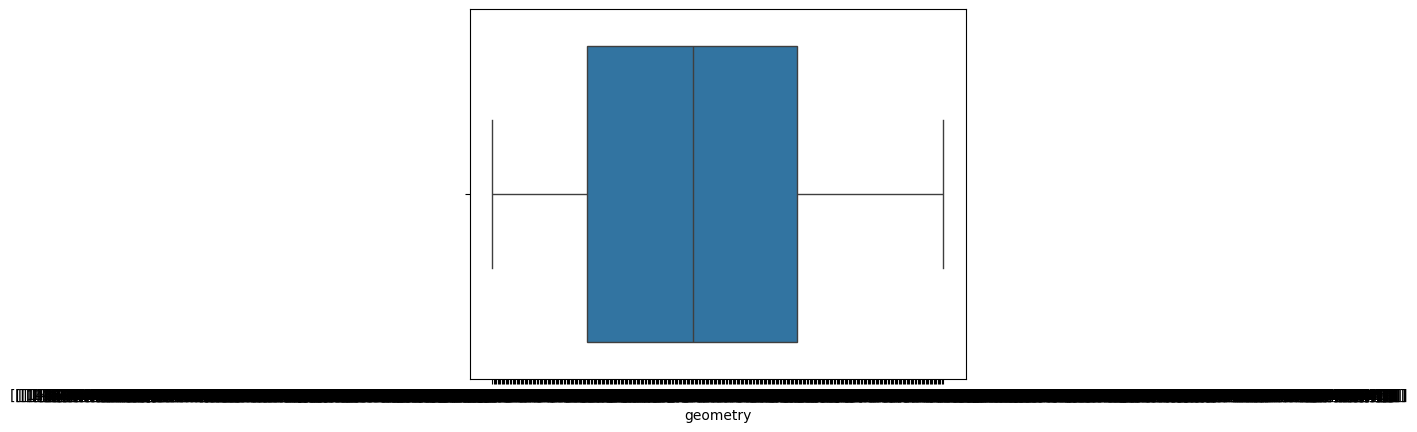

In [ ]:
#target varaible
sns.boxplot(data  = data, x= data.geometry )

<Axes: xlabel='label'>

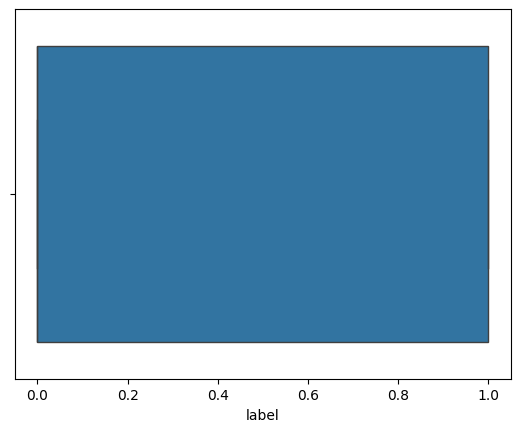

In [ ]:
#target varaible
sns.boxplot(data  = data, x= data.label  )

<Axes: xlabel='date'>

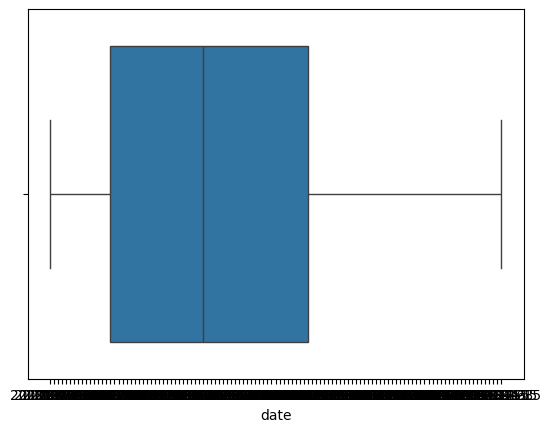

In [ ]:
#target varaible
sns.boxplot(data  = data, x= data.date )

<Axes: xlabel='tile_number'>

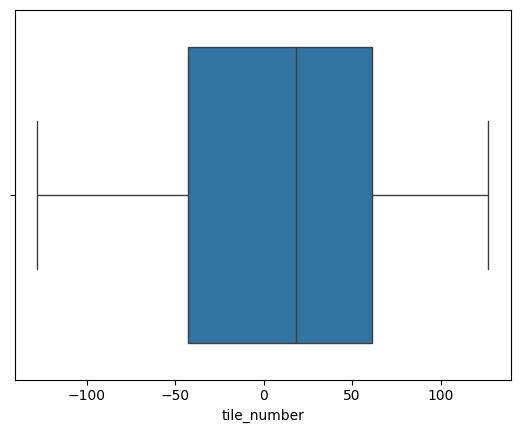

In [ ]:
#target varaible
sns.boxplot(data  = data, x= data.tile_number )

Scatter Plot: A scatter plot is a type of data visualization that displays values for typically two variables for a set of data. It is used to observe and show relationships between these variables, with each point representing an observation in the dataset.

Components of a Scatter Plot
Points: Each point on the scatter plot represents one observation from the dataset, with the position determined by the values of the two variables.
Axes: The x-axis and y-axis represent the two variables being plotted.
Title: The title of the scatter plot provides an overview of what the plot represents.
Labels: Axes labels indicate the variables being plotted and their units if applicable.

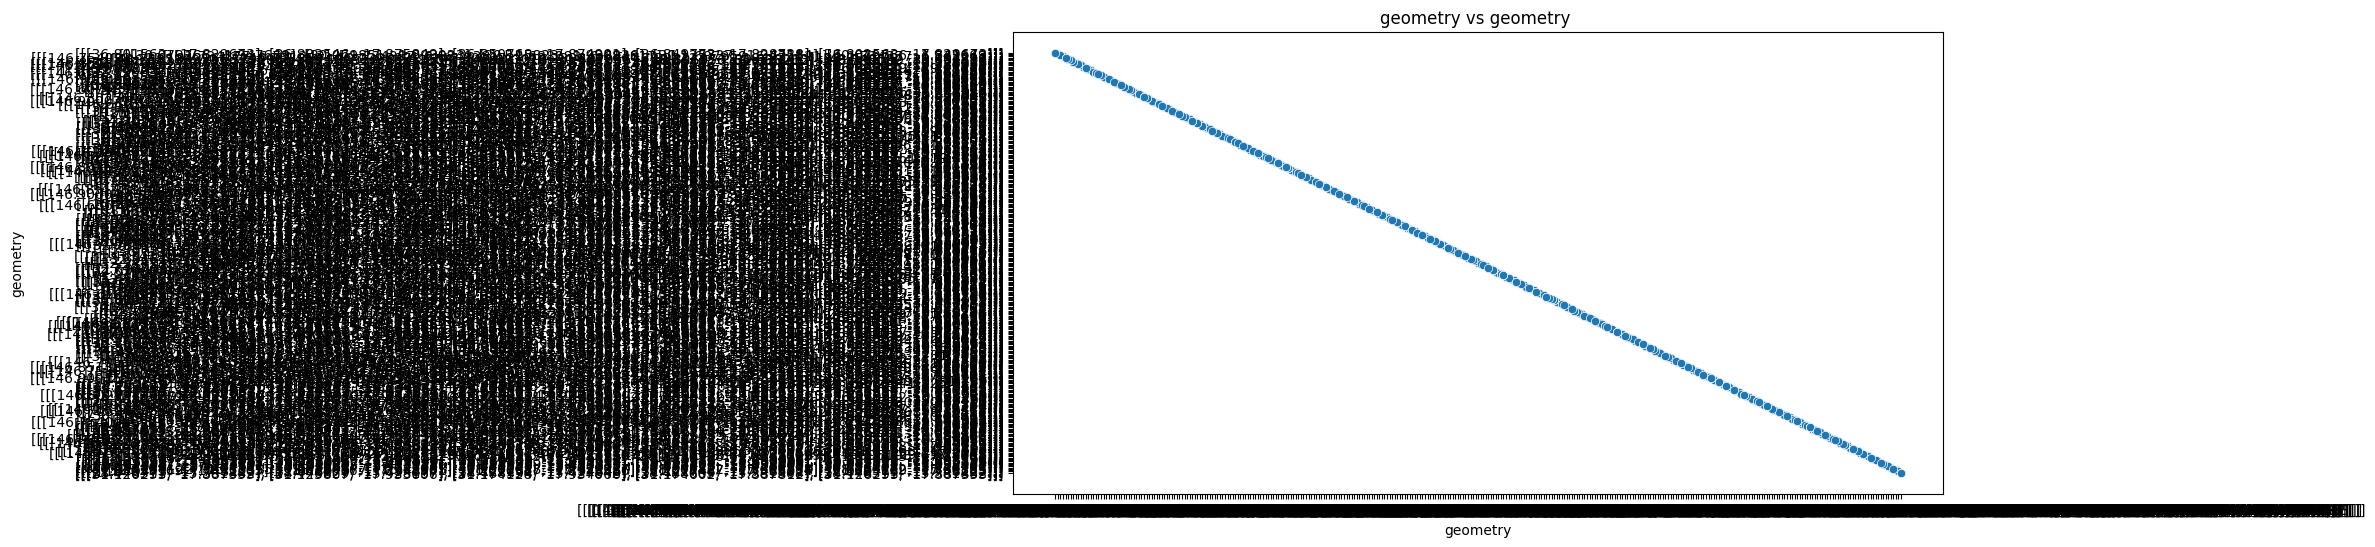

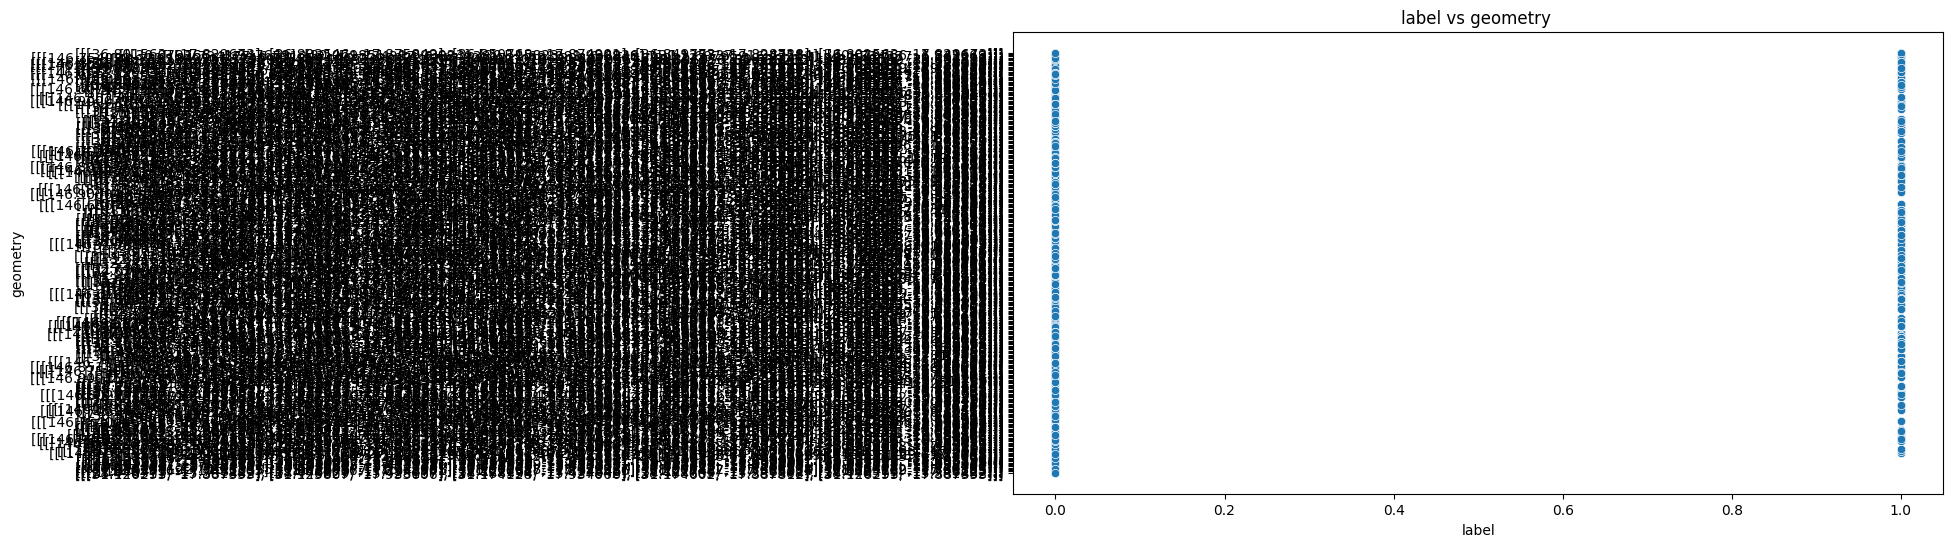

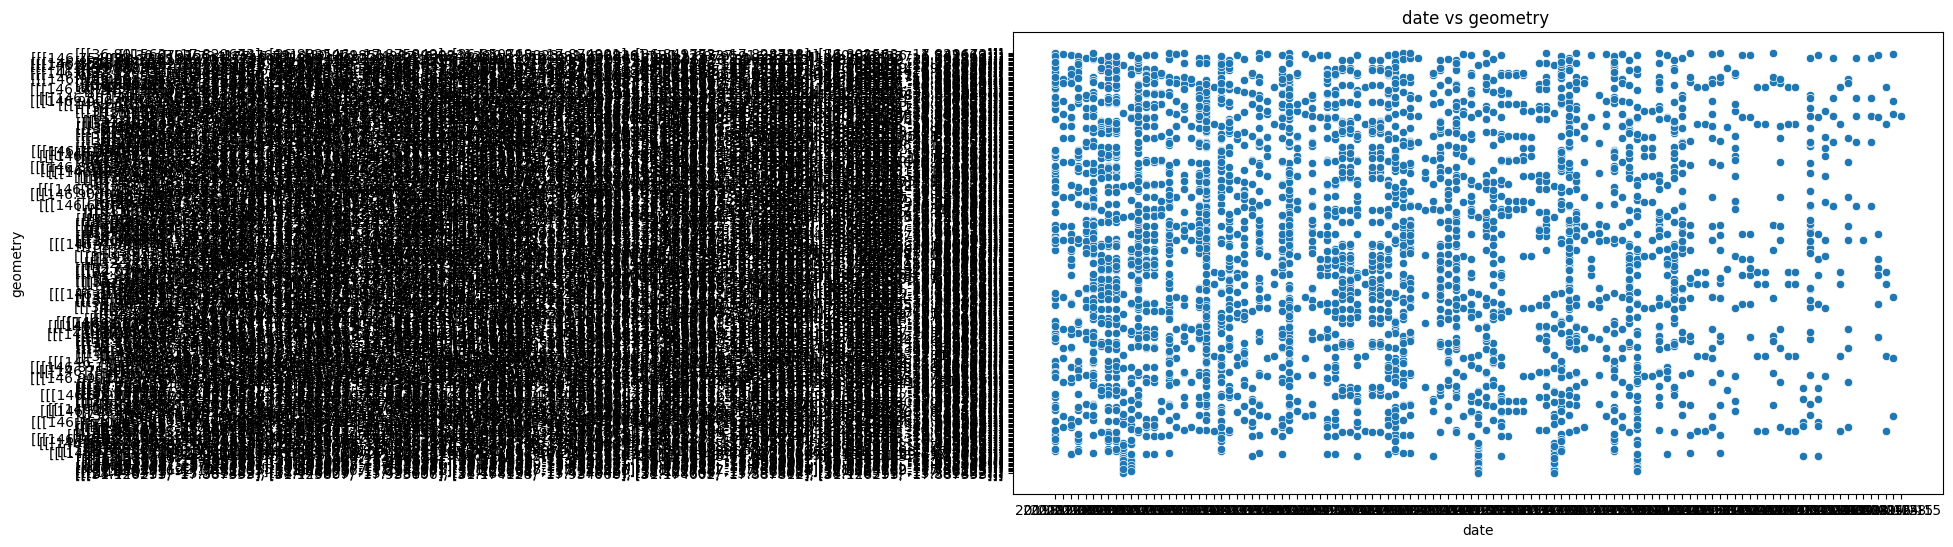

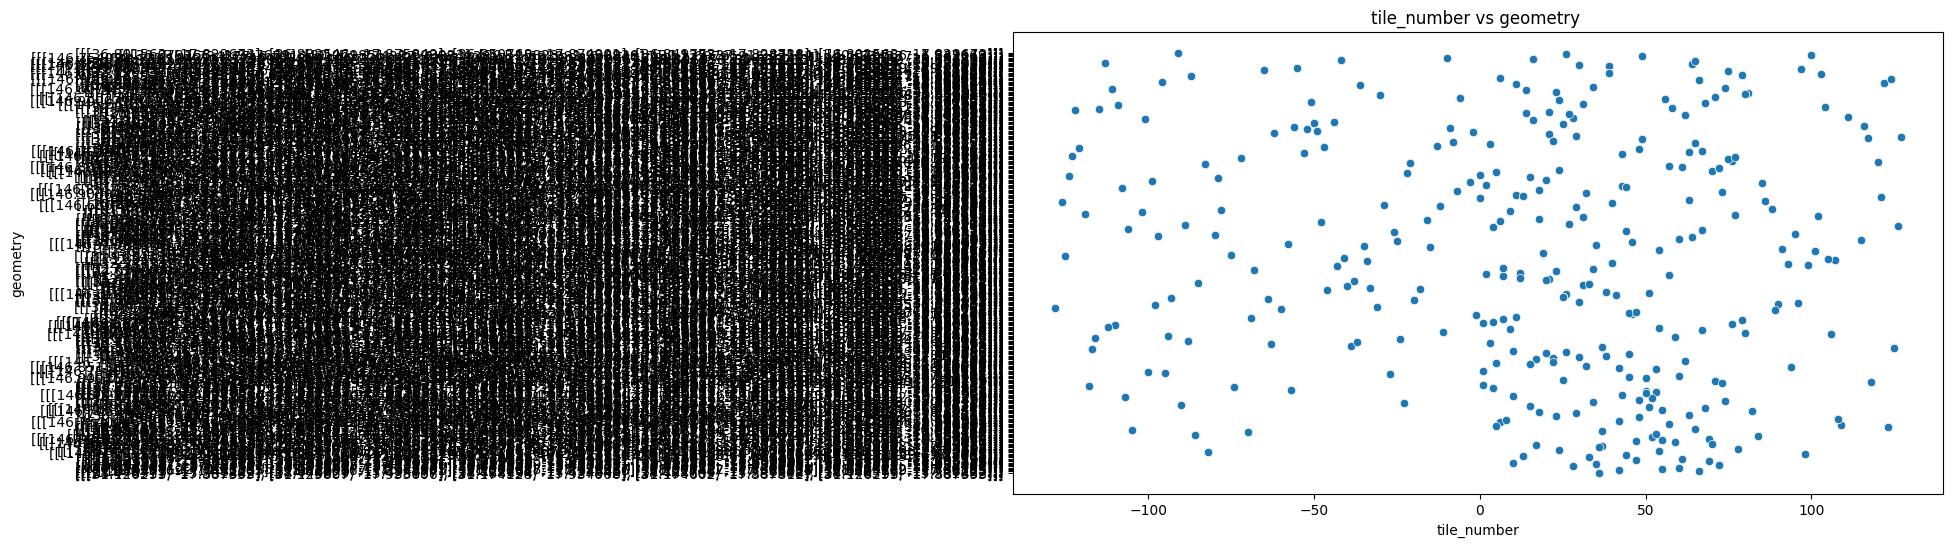

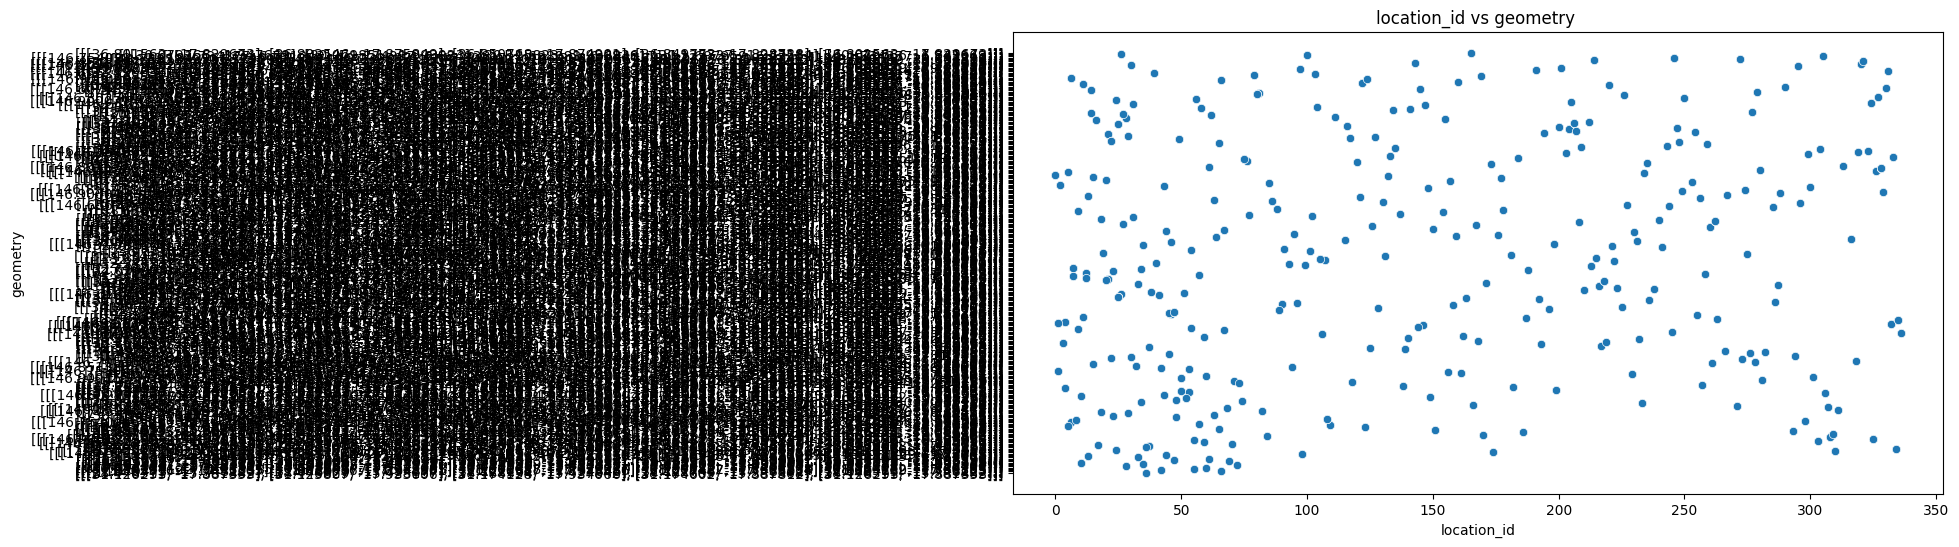

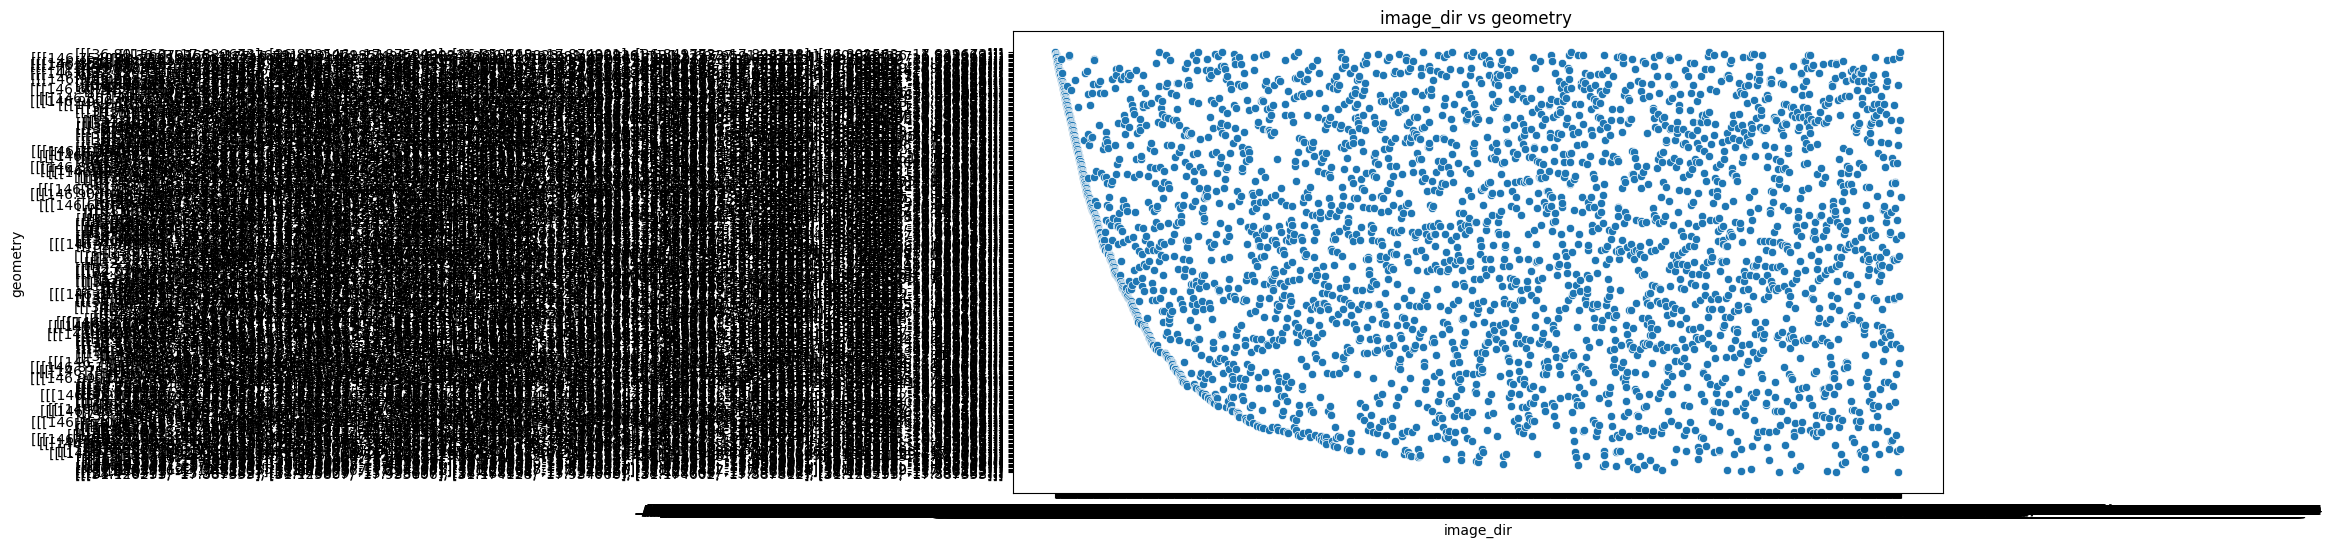

In [ ]:
## scatter plot
for col in data.columns:
    if col in ['id','geometry ']:
        continue
    plt.figure(figsize =(12,6))
    ax= sns.scatterplot(data = data,x = data[col] ,y = data.geometry )
    ax.set_title("{} vs geometry ".format(col))
    plt.show()

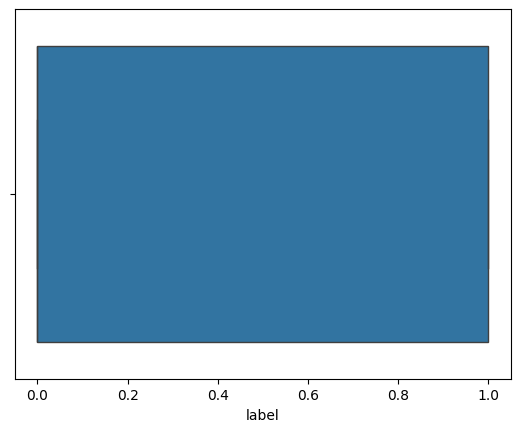

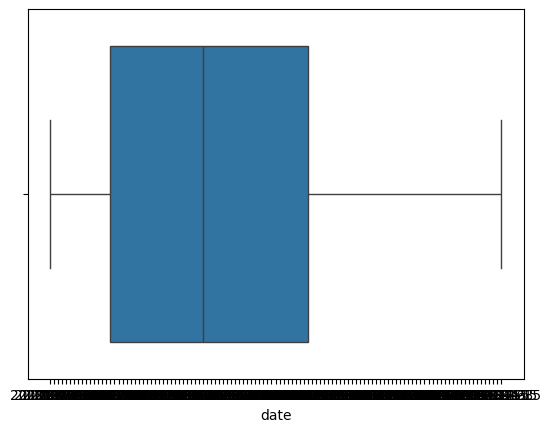

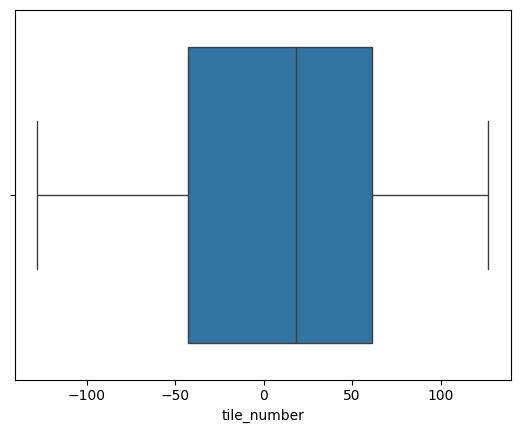

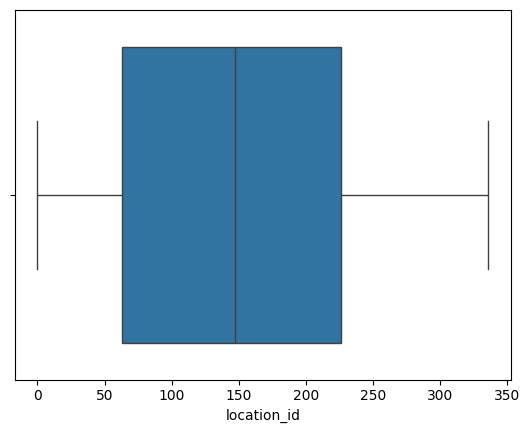

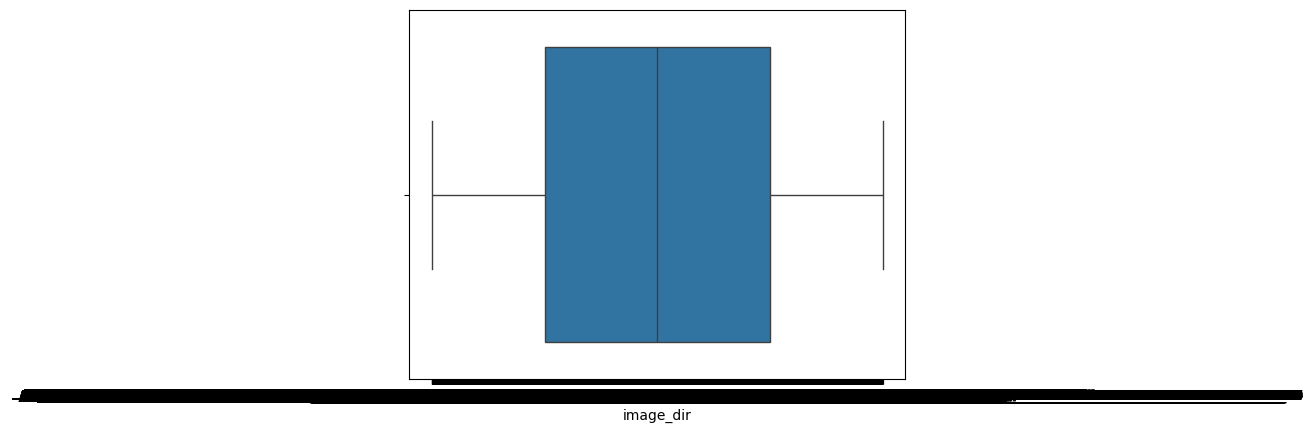

In [ ]:
## scatter plot
for col in data.columns:
    #plt.figure(figsize =(6,6))
    if col in ['id','geometry']:
        continue
    sns.boxplot(data  = data, x= data[col])
    plt.show()
##

Feature selection is a crucial step in the data preprocessing pipeline for machine learning and statistical modeling. It involves selecting the most important features (variables, predictors) from a dataset that contribute the most to the predictive power of a model. Effective feature selection can improve model performance, reduce overfitting, and decrease computational cost.

In [ ]:
### Feature Select - F regression
def select_features(X_data, y_data, X_test,k='all'):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    fs.fit(X_data, y_data)
    # transform train input data
    X_data_fs = fs.transform(X_data)
    # transform test input data
    X_test_fs = fs.transform(X_data)
    return X_train_fs, X_test_fs, fs

In [ ]:
geometry = np.random.choice(1000, replace=False, size=50)
data_trimmed = data.iloc[geometry]

In [ ]:
X = data_trimmed.drop(labels=['geometry'],axis =1).values
y = data_trimmed['geometry'].values
X_test = data.values

Scikit-learn (sklearn) is a powerful and widely-used Python library for machine learning. It provides simple and efficient tools for data mining, data analysis, and machine learning. Scikit-learn is built on top of NumPy, SciPy, and Matplotlib and is known for its user-friendly interface and comprehensive documentation.


In [ ]:
from sklearn.feature_selection import f_regression, SelectKBest

def select_features(X_data, y_data, X_test, k='all'):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k=k)
    fs.fit(X_data, y_data)
    # transform train input data
    X_data_fs = fs.transform(X_data)
    # transform test input data
    return X_train_fs,
    fs.transform(X_data), fs
    plt.show()

In [ ]:
X_data, X_val, y_data, y_val = train_test_split(X, y, test_size=0.25)

In [ ]:
model=CatBoostRegressor(iterations=100, depth=10, learning_rate=0.01, loss_function='RMSE')

In [ ]:
import pandas as pd

# Convert y_data to a Pandas Series
y_data = pd.Series(y_data)

# Convert non-numeric values to NaN
y_data = y_data.apply(lambda x: pd.to_numeric(x, errors='coerce'))

# Drop any rows with NaN values
y_data = y_data.dropna()
plt.show()


In [ ]:
years= np.sort(data['date'].unique())[::-1]


In [ ]:
import numpy as np
import geopandas as gpd
import pandas as pd
#import rasterio
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.feature_selection import SelectKBest

from catboost import CatBoostRegressor

# Rest of the code remains the same







In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data =  pd.read_csv("/content/drive/MyDrive/data set flood/s1_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data =  pd.read_csv("/content/drive/MyDrive/Copy of s2_data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data.info(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   geometry     2236 non-null   object
 1   label        2236 non-null   int64 
 2   date         2236 non-null   object
 3   tile_number  2236 non-null   int64 
 4   id           2236 non-null   object
 5   location_id  2236 non-null   int64 
 6   image_dir    2236 non-null   object
dtypes: int64(3), object(4)
memory usage: 122.4+ KB


In [ ]:
data

geometry  label        date  \
0     [[[48.747512, 30.683485], [48.748582, 30.63731...      1  2019-04-23   
1     [[[34.810117, -19.588125], [34.810635, -19.634...      0  2019-01-26   
2     [[[48.746053, 31.442841], [48.747157, 31.39668...      0  2019-03-04   
3     [[[18.682633, -33.850628], [18.681385, -33.896...      0  2018-12-20   
4     [[[32.622722, -19.901449], [32.622612, -19.947...      0  2019-03-10   
...                                                 ...    ...         ...   
2231  [[[38.11145, -17.185024], [38.111229, -17.2313...      0  2019-02-02   
2232  [[[32.571326, 0.397166], [32.571328, 0.350845]...      0  2019-02-04   
2233  [[[36.795224, -1.242082], [36.795185, -1.28837...      0  2019-01-09   
2234  [[[48.746438, 30.72965], [48.747512, 30.683485...      0  2019-03-17   
2235  [[[48.687666, 31.626511], [48.688807, 31.58035...      0  2019-03-22   

      tile_number                                     id  location_id  \
0             -12  sen12floods_s2_labels_0244_2019_04_23          244   
1              11    sen12floods_s2_labels_11_2019_01_26           11   
2              31  sen12floods_s2_labels_0287_2019_03_04          287   
3               5  sen12floods_s2_labels_0005_2018_12_20            5   
4              21    sen12floods_s2_labels_21_2019_03_10           21   
...           ...                                    ...          ...   
2231          -85  sen12floods_s2_labels_0171_2019_02_02          171   
2232           76  sen12floods_s2_labels_0076_2019_02_04           76   
2233           15  sen12floods_s2_labels_0015_2019_01_09           15   
2234           63    sen12floods_s2_labels_63_2019_03_17           63   
2235            6  sen12floods_s2_labels_0262_2019_03_22          262   

                                              image_dir  
0     ../input/sen12flood/sen12flood/sen12floods_s2_...  
1     ../input/sen12flood/sen12flood/sen12floods_s2_...  
2     ../input/sen12flood/sen12flood/sen12floods_s2_...  
3     ../input/sen12flood/sen12flood/sen12floods_s2_...  
4     ../input/sen12flood/sen12flood/sen12floods_s2_...  
...                                                 ...  
2231  ../input/sen12flood/sen12flood/sen12floods_s2_...  
2232  ../input/sen12flood/sen12flood/sen12floods_s2_...  
2233  ../input/sen12flood/sen12flood/sen12floods_s2_...  
2234  ../input/sen12flood/sen12flood/sen12floods_s2_...  
2235  ../input/sen12flood/sen12flood/sen12floods_s2_...  

[2236 rows x 7 columns]

In [ ]:
def summary(col1,col2,year):
    pivot = pd.pivot_table(data, values=[col1], index=['geometry',col2],
                    aggfunc={col1: [min, max, np.mean,np.std]})
    pivot = pivot.sort_values(by=(col1,'tile_number')).reindex(np.sort(data['geometry'].unique()), level=0)

    return pivot.loc[year,:]
def pivot(col1,col2):
    pivot = pd.pivot_table(data, values=[col1], index=[col2,'geometry'],
                    aggfunc={col1: [min, max, np.mean,np.std]})
    pivot = pivot.sort_values(by=(col1,'tile_number')).reindex(np.sort(data['geometry'].unique()), level=1)
    pivot = pivot.reset_index()
    return pivot
    plt.show()



In [ ]:
data[pd.isnull(data).any(axis=1)]

Empty DataFrame
Columns: [geometry, label, date, tile_number, id, location_id, image_dir]
Index: []

In [ ]:
# Option 1: Add the 'tile_number' column to the data DataFrame
data['tile_number'] = np.arange(len(data))


In [ ]:
data['tile_number'] = np.arange(len(data))

In [ ]:
# Do not overwrite the original DataFrame
data_with_tile_number = data.copy()
data_with_tile_number['tile_number'] = np.arange(len(data))




In [ ]:
print(type(pivot))

<class 'function'>


In [ ]:
data['date']= data['date'].astype('str')

In [ ]:
def top10(date):
    return data[data['date']==year].sort_values(by='label')[::-1].head(10)
def bottom10(year):
    return data[data['date']==year].sort_values(by='label').head(10)

In [ ]:
years= np.sort(data['date'].unique())[::-1]

<function matplotlib.pyplot.show(close=None, block=None)>

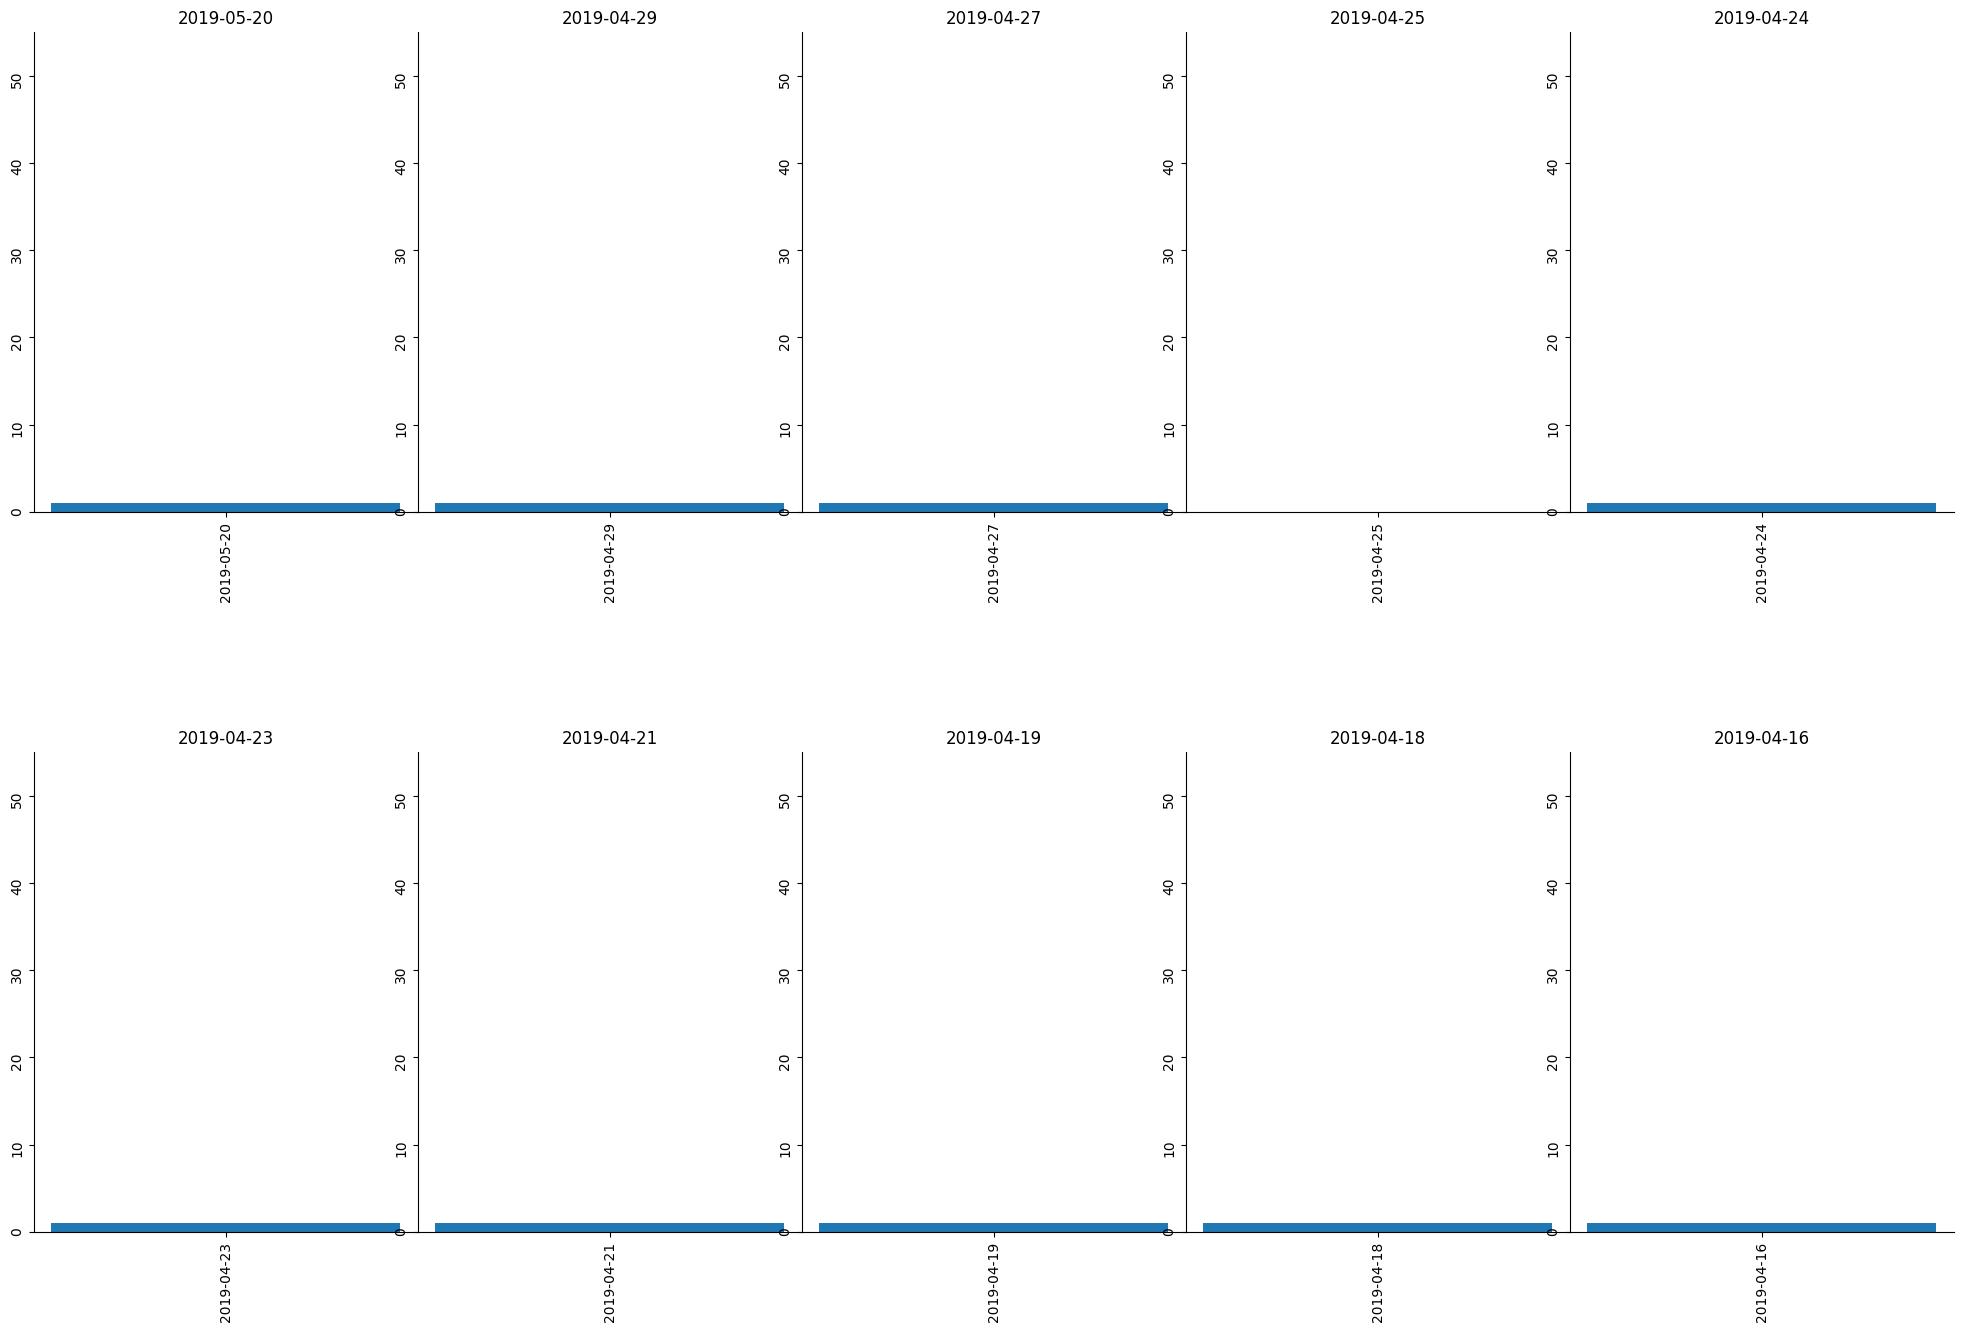

In [ ]:
# Import necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the data variable (assuming it's a Pandas DataFrame)
# data = ...

# Define the top10 and bottom10 functions
def top10(year):
    return data[data['date'] == year].sort_values(by='label')[::-1].head(10)

def bottom10(year):
    return data[data['date'] == year].sort_values(by='label').head(10)

# Get unique years from the data
years = np.sort(data['date'].unique())[::-1]

# Create subplots
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))
plt.subplots_adjust(left=0.2, bottom=0, right=1, top=1, wspace=0, hspace=0.5)

# Loop through each year and plot the top 10 bars
for ax, year in zip(axs.ravel(), years):
    ax.bar(top10(year)['date'], top10(year)['label'])
    ax.set_title(year)
    ax.tick_params(labelrotation=90)
    ax.set_ylim([0, 55])
    sns.despine()

plt.show

Here we using another CSV file for more data and more data representation


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data =  pd.read_csv("/content/drive/MyDrive/flood.csv.zip")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
flood = pd.read_csv('/content/drive/MyDrive/flood.csv.zip')
flood.head(10)

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0                 3                   8                6              6   
1                 8                   4                5              7   
2                 3                  10                4              1   
3                 4                   4                2              7   
4                 3                   7                5              2   
5                 6                   6                6              4   
6                 6                   7                4              5   
7                 7                   3                5              5   
8                 6                   3                5              4   
9                 4                   3                5              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             4              4            6          2                      3   
1             7              9            1          5                      5   
2             7              5            4          7                      4   
3             3              4            1          4                      6   
4             5              8            5          2                      7   
5             6              4            3          1                      3   
6             5              5            4          8                      8   
7             6              6            6          7                      6   
8             5             11            3          2                      9   
9             2              3            7          7                     10   

   Encroachments  ...  DrainageSystems  CoastalVulnerability  Landslides  \
0              2  ...               10                     7           4   
1              4  ...                9                     2           6   
2              9  ...                7                     4           4   
3              4  ...                4                     2           6   
4              5  ...                7                     6           5   
5              5  ...               10                     5           9   
6              4  ...                8                     4           5   
7              5  ...                4                     6           9   
8              7  ...                2                     8           7   
9              4  ...                7                     6           5   

   Watersheds  DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
0           2                            3                4            3   
1           2                            1                1            9   
2           8                            6                1            8   
3           6                            8                8            6   
4           3                            3                4            4   
5           5                            5                7            3   
6           4                            7                7            5   
7           7                           10                6            5   
8           5                            4                9            6   
9           6                            7                5            7   

   InadequatePlanning  PoliticalFactors  FloodProbability  
0                   2                 6             0.450  
1                   1                 3             0.475  
2                   3                 6             0.515  
3                   6                10             0.520  
4                   3                 4             0.475  
5                   3                 2             0.470  
6                   4                 8             0.570  
7                   4                 5             0.585  
8                   5                 7             0.580  
9          

In [ ]:
flood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [ ]:
flood.describe()

MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
count      50000.000000        50000.000000      50000.00000   50000.000000   
mean           4.991480            4.984100          5.01594       5.008480   
std            2.236834            2.246488          2.23131       2.222743   
min            0.000000            0.000000          0.00000       0.000000   
25%            3.000000            3.000000          3.00000       3.000000   
50%            5.000000            5.000000          5.00000       5.000000   
75%            6.000000            6.000000          6.00000       6.000000   
max           16.000000           18.000000         16.00000      17.000000   

       Urbanization  ClimateChange  DamsQuality     Siltation  \
count  50000.000000   50000.000000  50000.00000  50000.000000   
mean       4.989060       4.988340      5.01536      4.988600   
std        2.243159       2.226761      2.24500      2.232642   
min        0.000000       0.000000      0.00000      0.000000   
25%        3.000000       3.000000      3.00000      3.000000   
50%        5.000000       5.000000      5.00000      5.000000   
75%        6.000000       6.000000      6.00000      6.000000   
max       17.000000      17.000000     16.00000     16.000000   

       AgriculturalPractices  Encroachments  ...  DrainageSystems  \
count           50000.000000   50000.000000  ...     50000.000000   
mean                5.006120       5.006380  ...         5.006060   
std                 2.234588       2.241633  ...         2.238107   
min                 0.000000       0.000000  ...         0.000000   
25%                 3.000000       3.000000  ...         3.000000   
50%                 5.000000       5.000000  ...         5.000000   
75%                 6.000000       6.000000  ...         6.000000   
max                16.000000      18.000000  ...        17.000000   

       CoastalVulnerability    Landslides   Watersheds  \
count          50000.000000  50000.000000  50000.00000   
mean               4.999920      4.984220      4.97982   
std                2.247101      2.227741      2.23219   
min                0.000000      0.000000      0.00000   
25%                3.000000      3.000000      3.00000   
50%                5.000000      5.000000      5.00000   
75%                6.000000      6.000000      6.00000   
max               17.000000     16.000000     16.00000   

       DeterioratingInfrastructure  PopulationScore  WetlandLoss  \
count                 50000.000000     50000.000000  50000.00000   
mean                      4.988200         4.984980      5.00512   
std                       2.231134         2.238279      2.23176   
min                       0.000000         0.000000      0.00000   
25%                       3.000000         3.000000      3.00000   
50%                       5.000000         5.000000      5.00000   
75%                       6.000000         6.000000      6.00000   
max                      17.000000        19.000000     22.00000   

       InadequatePlanning  PoliticalFactors  FloodProbability  
count        50000.000000      50000.000000      50000.000000  
mean             4.994360          4.990520          0.499660  
std              2.230011          2.246075          0.050034  
min              0.000000          0.000000          0.285000  
25%              3.000000          3.000000          0.465000  
50%              5.000000          5.000000          0.500000  
75%              6.000000          6.000000          0.535000  
max             16.000000         16.000000          0.725000  

[8 rows x 21 columns]

In [ ]:
flood.isnull().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [ ]:
flood.duplicated().sum()

0

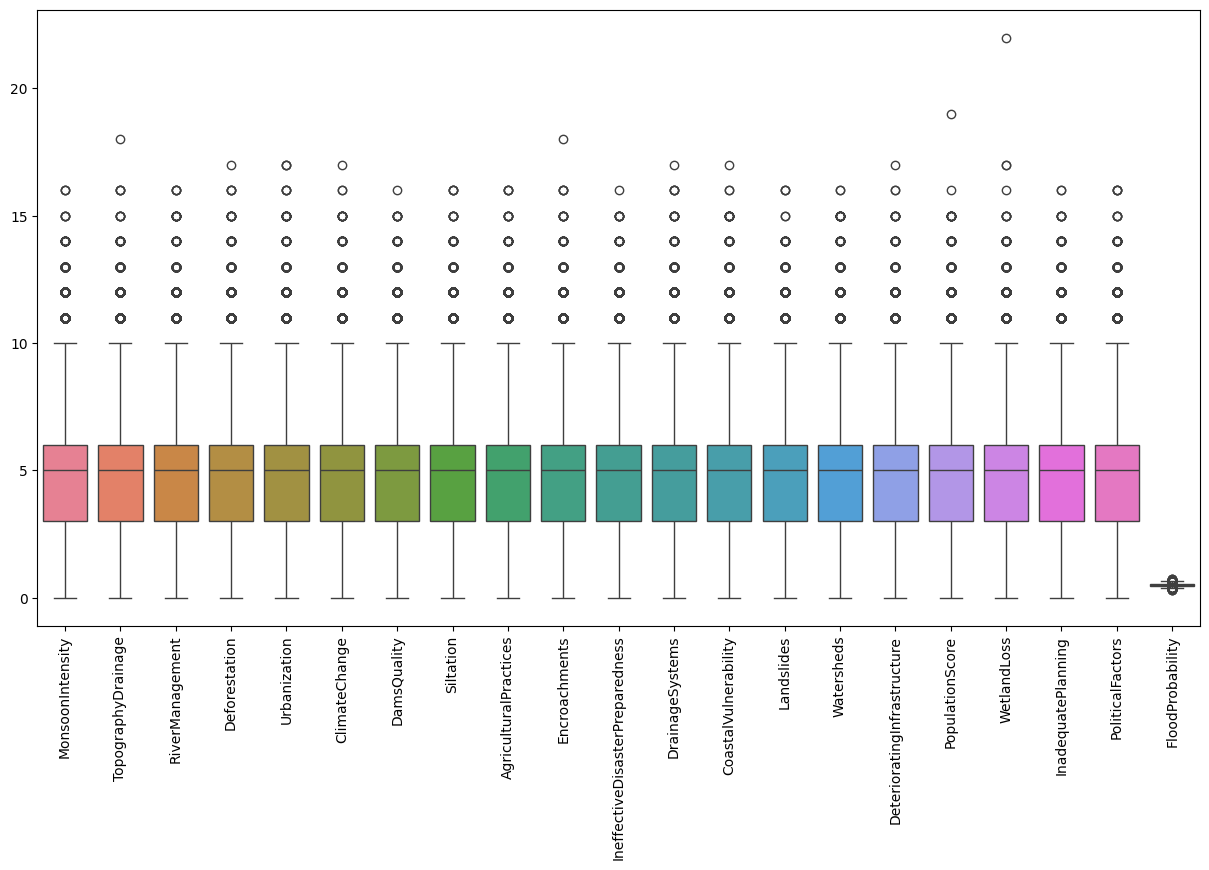

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(data=flood, orient='v')
plt.xticks(rotation=90)
plt.show()

In [ ]:
for column in flood.columns:
    if flood[column].dtype in ["int64", "float64"]:
        q1 = flood[column].quantile(0.25)
        q3 = flood[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        flood = flood[(flood[column] >= lower_bound) & (flood[column] <= upper_bound)]

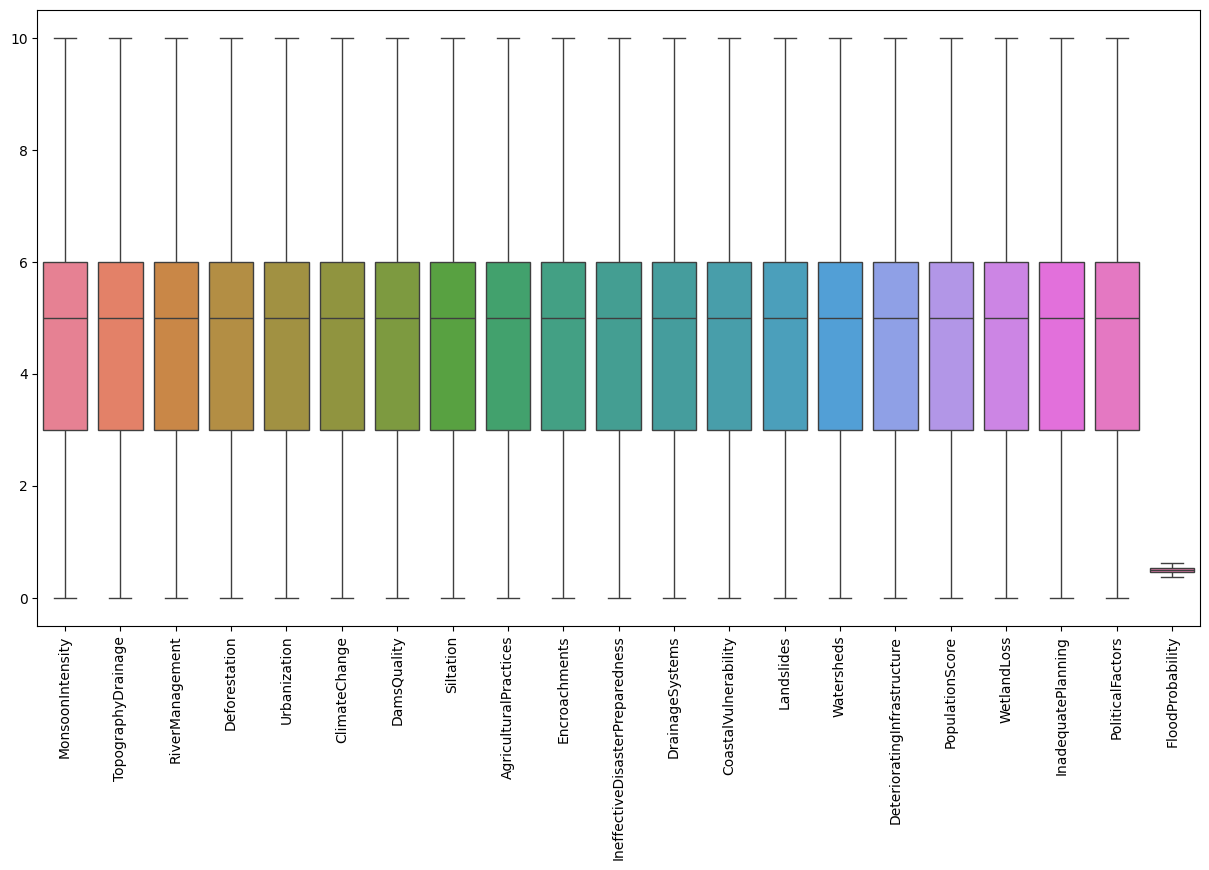

In [ ]:
# Check Data After Removing Outlier
plt.figure(figsize=(15,8))
sns.boxplot(data=flood, orient='v')
plt.xticks(rotation=90)
plt.show()

Probability data distribution is a fundamental concept in statistics and data analysis, describing how the values of a random variable are distributed. Understanding these distributions is crucial for statistical modeling, hypothesis testing, and making inferences from data.

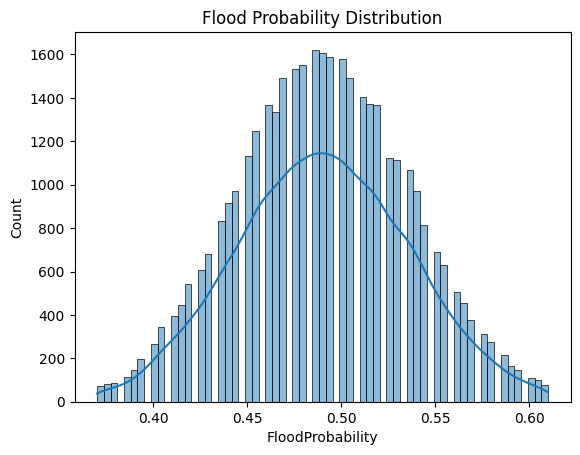

In [ ]:
# Flood Probability Data Distribution
sns.histplot(x=flood['FloodProbability'], data=flood, kde=True)
plt.title("Flood Probability Distribution")
plt.show()

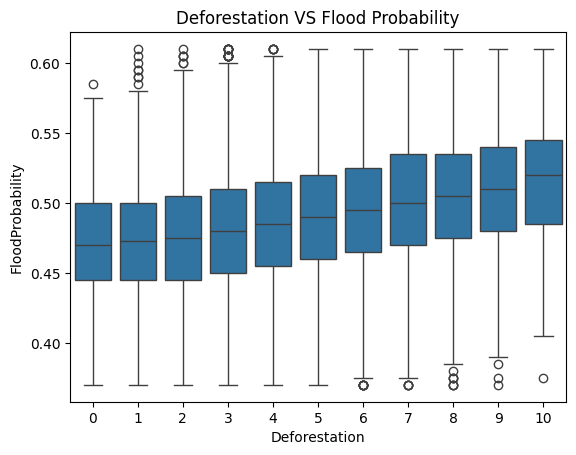

In [ ]:
sns.boxplot(x=flood['Deforestation'], y=flood['FloodProbability'], data=flood)
plt.title("Deforestation VS Flood Probability")
plt.show()

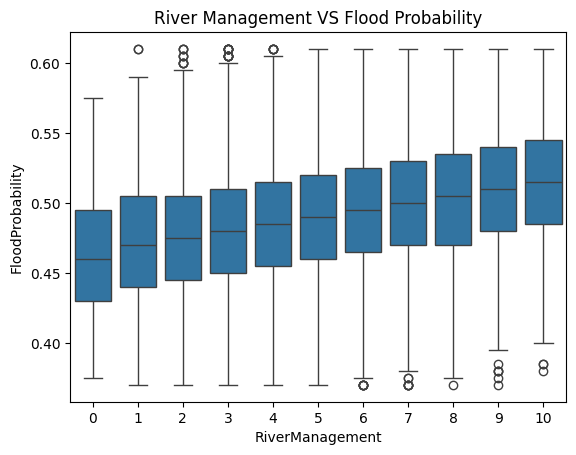

In [ ]:
sns.boxplot(x=flood['RiverManagement'], y=flood['FloodProbability'], data=flood)
plt.title("River Management VS Flood Probability")
plt.show()

A heatmap is a data visualization technique that shows the magnitude of a phenomenon as color in two dimensions. The variation in color can help to visualize complex data patterns and relationships in a straightforward and intuitive way. Heatmaps are particularly useful for visualizing data matrices, correlations, and large datasets with multiple variables.

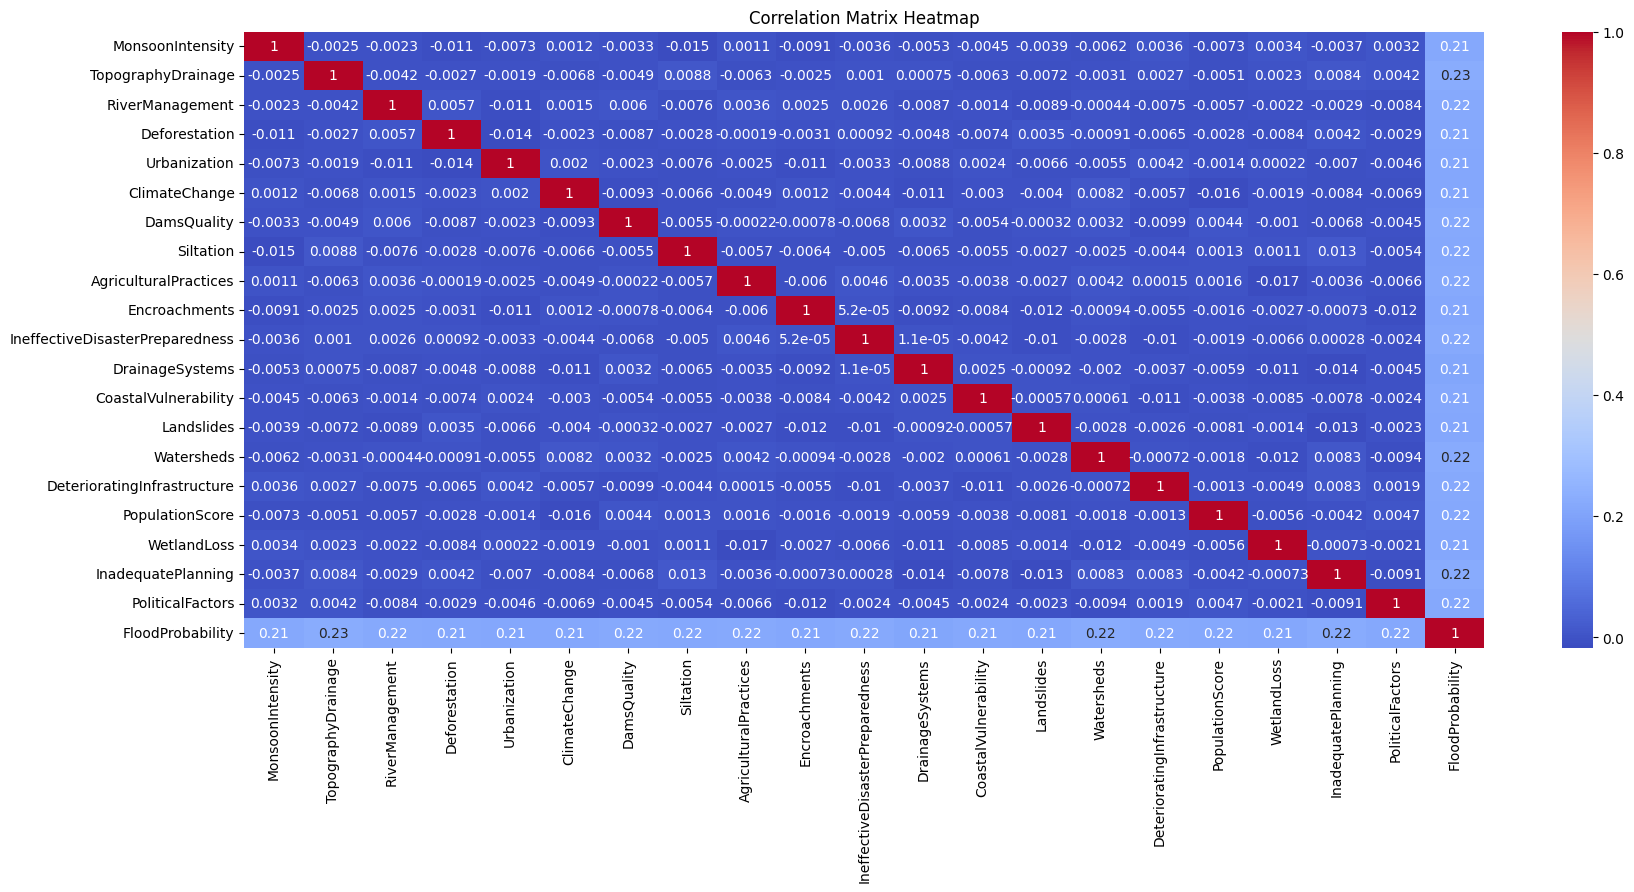

In [ ]:
plt.figure(figsize=(20,8))
sns.heatmap(flood.corr(), cmap='coolwarm', annot=True)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
# Create a feature and target variable
X = flood.drop('FloodProbability', axis=1) # Feature
y = flood['FloodProbability'] # Target

In [ ]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

A regressor is a machine learning model used for predicting a continuous target variable. Regression analysis is a fundamental part of predictive modeling and is used across various domains such as finance, healthcare, and engineering.

In [ ]:
#Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

rf.fit(X_train, y_train)

RandomForestRegressor()

In [ ]:
y_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

print('R2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 0.7173209029094326
Mean Squared Error : 0.0005869270880681821
Root Mean Squared Error : 0.024226578133698166


In [ ]:
#Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()

dt.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = dt.predict(X_test)

print('R2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 0.1011252204251879
Mean Squared Error : 0.0018663352272727278
Root Mean Squared Error : 0.043201102153448905


Linear regression is a simple yet powerful statistical method used for modeling the relationship between a dependent variable and one or more independent variables. The goal is to find the linear equation that best predicts the dependent variable.

In [ ]:
#Linear Regression

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()

linreg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = linreg.predict(X_test)

print('R2 Score :', r2_score(y_test, y_pred))
print('Mean Squared Error :', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error :', np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score : 1.0
Mean Squared Error : 9.646611036787316e-33
Root Mean Squared Error : 9.821716263865148e-17



Here we using another CSV file to extend our research

In [ ]:
data =  pd.read_csv("/content/kerala.csv")

In [ ]:
data.head(10)

SUBDIVISION  YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG  \
0      KERALA  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5   
1      KERALA  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8   
2      KERALA  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2   
3      KERALA  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8   
4      KERALA  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6   
5      KERALA  1906  26.7   7.4   9.9   59.4  160.8   414.9   954.2  442.8   
6      KERALA  1907  18.8   4.8  55.7  170.8  101.4   770.9   760.4  981.5   
7      KERALA  1908   8.0  20.8  38.2  102.9  142.6   592.6   902.2  352.9   
8      KERALA  1909  54.1  11.8  61.3   93.8  473.2   704.7   782.3  258.0   
9      KERALA  1910   2.7  25.7  23.3  124.5  148.8   680.0   484.1  473.8   

     SEP    OCT    NOV    DEC   ANNUAL RAINFALL FLOODS  
0  197.7  266.9  350.8   48.4            3248.6    YES  
1  491.6  358.4  158.3  121.5            3326.6    YES  
2  341.8  354.1  157.0   59.0            3271.2    YES  
3  222.7  328.1   33.9    3.3            3129.7    YES  
4  217.2  383.5   74.4    0.2            2741.6     NO  
5  131.2  251.7  163.1   86.0            2708.0     NO  
6  225.0  309.7  219.1   52.8            3671.1    YES  
7  175.9  253.3   47.9   11.0            2648.3     NO  
8  195.4  212.1  171.1   32.3            3050.2    YES  
9  248.6  356.6  280.4    0.1            2848.6     NO

In [ ]:
#Now we will cheak if any colomns is left empty
data.apply(lambda x:sum(x.isnull()), axis=0)

SUBDIVISION         0
YEAR                0
JAN                 0
FEB                 0
MAR                 0
APR                 0
MAY                 0
JUN                 0
JUL                 0
AUG                 0
SEP                 0
OCT                 0
NOV                 0
DEC                 0
 ANNUAL RAINFALL    0
FLOODS              0
dtype: int64

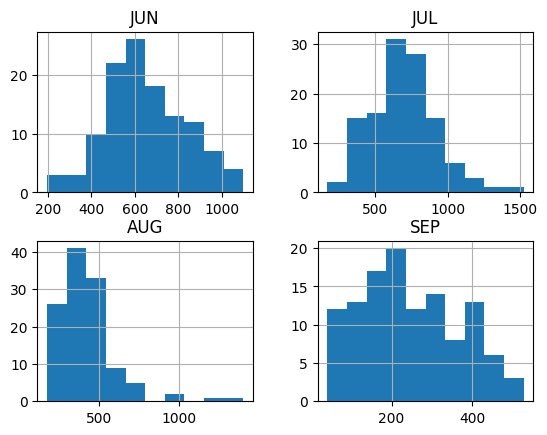

In [ ]:
#Let's see hoe the rainfall index vary during rainy season
import matplotlib.pyplot as plt
%matplotlib inline
c = data[['JUN','JUL','AUG','SEP']]
c.hist()
plt.show()


In [ ]:
#Now let's seperate the data which we are gonna use for prediction
x = data.iloc[:,1:14]
x.head()

YEAR   JAN   FEB   MAR    APR    MAY     JUN     JUL    AUG    SEP    OCT  \
0  1901  28.7  44.7  51.6  160.0  174.7   824.6   743.0  357.5  197.7  266.9   
1  1902   6.7   2.6  57.3   83.9  134.5   390.9  1205.0  315.8  491.6  358.4   
2  1903   3.2  18.6   3.1   83.6  249.7   558.6  1022.5  420.2  341.8  354.1   
3  1904  23.7   3.0  32.2   71.5  235.7  1098.2   725.5  351.8  222.7  328.1   
4  1905   1.2  22.3   9.4  105.9  263.3   850.2   520.5  293.6  217.2  383.5   

     NOV    DEC  
0  350.8   48.4  
1  158.3  121.5  
2  157.0   59.0  
3   33.9    3.3  
4   74.4    0.2

In [ ]:
#Now seperate the flood label from the dataset
y = data.iloc[:, -1]
y.head()

0    YES
1    YES
2    YES
3    YES
4     NO
Name: FLOODS, dtype: object

In [ ]:
#Data might be widely distributed so let's scale it between 0 and 1
from sklearn import preprocessing
minmax = preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.        , 0.34371257, 0.56582278, ..., 0.39727673, 0.95570189,
        0.2388724 ],
       [0.00854701, 0.08023952, 0.03291139, ..., 0.5804966 , 0.37952709,
        0.60039565],
       [0.01709402, 0.03832335, 0.23544304, ..., 0.57188626, 0.37563604,
        0.29129575],
       ...,
       [0.98290598, 0.02874251, 0.04810127, ..., 0.31517821, 0.28105358,
        0.11622156],
       [0.99145299, 0.02275449, 0.08607595, ..., 0.24809772, 0.18258007,
        0.18793274],
       [1.        , 0.34850299, 0.65949367, ..., 0.57589107, 0.28105358,
        0.3214639 ]])

In [ ]:
#Let's divide the dataset into 2 sets:train and test in ratio (4:1)
from sklearn import model_selection,neighbors
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
#Let's see how our train set looks like
x_train.head()

YEAR   JAN  FEB   MAR    APR    MAY     JUN     JUL    AUG    SEP    OCT  \
90   1991  10.9  4.4  33.2   97.0  113.4  1096.1   905.5  465.5   48.5  307.8   
48   1949   0.6  1.8   4.5   98.1  440.0   536.3   758.7  445.2  354.5  229.1   
104  2005  19.8  7.0  25.3  205.9  134.8   619.2   832.7  291.0  414.7  240.1   
22   1923  24.7  0.7  78.9   43.5   80.0   722.5  1008.7  943.0  254.3  203.1   
15   1916   0.0  7.8  22.0   82.4  199.0   920.2   513.9  396.9  339.3  320.7   

       NOV   DEC  
90    99.9   2.3  
48    71.9   1.8  
104  184.3  56.4  
22    83.9  41.6  
15   134.3   8.9

In [ ]:
#Let's see how our train set looks like
y_train.head()

90     YES
48     YES
104    YES
22     YES
15     YES
Name: FLOODS, dtype: object

KNN Classifier


In [ ]:
clf = neighbors.KNeighborsClassifier()
knn_clf = clf.fit(x_train,y_train)

In [ ]:
#Let's predict chances of flood
y_predict = knn_clf.predict(x_test)
print('predicted chances of flood')
print(y_predict)

predicted chances of flood
['YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'NO' 'NO' 'NO' 'NO']


In [ ]:
#Actual chances of flood
print("actual values of floods:")
print(y_test)

actual values of floods:
45     YES
33      NO
59     YES
9       NO
93     YES
18     YES
12      NO
1      YES
40     YES
35     YES
78      NO
27      NO
17      NO
5       NO
66      NO
108     NO
81      NO
109    YES
107     NO
86      NO
54     YES
115     NO
34      NO
7       NO
Name: FLOODS, dtype: object


In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
from sklearn import model_selection

knn_accuracy = model_selection.cross_val_score(knn_clf, x_test, y_test, cv=3, scoring='accuracy', n_jobs=-1)

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


In [ ]:
knn_accuracy.mean()

0.75

2. Logistic Regression

In [ ]:
x_train_std = minmax.fit_transform(x_train)
x_test_std = minmax.transform(x_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr_clf = lr.fit(x_train_std,y_train)

lr_accuracy = cross_val_score(lr_clf,x_test_std,y_test,cv=3,scoring='accuracy',n_jobs=-1)

In [ ]:
lr_accuracy.mean()

0.6666666666666666

In [ ]:
y_predict = lr_clf.predict(x_test_std)
print('Predicted chances of flood')
print(y_predict)


Predicted chances of flood
['YES' 'NO' 'YES' 'YES' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES'
 'YES' 'NO' 'YES' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO']


In [ ]:
print('Actual chances of flood')
print(y_test.values)

Actual chances of flood
['YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO']


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\naccuracy score: %f" % (accuracy_score(y_test, y_predict) * 100))
print("recall score: %f" % (recall_score(y_test, y_predict, pos_label='YES') * 100))
#print("roc score: %f" % (roc_auc_score(y_test, y_predict) * 100))
y_predict_numeric = np.where(y_predict == 'YES', 1, 0)
print("roc score: %f" % (roc_auc_score(y_test, y_predict_numeric) * 100))


accuracy score: 83.333333
recall score: 100.000000
roc score: 86.666667


3. Decision tree classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(x_train,y_train)
dtc_clf_acc = cross_val_score(dtc_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
dtc_clf_acc

array([0.625     , 0.80645161, 0.70967742])

In [ ]:
#Predicted flood chances
y_pred = dtc_clf.predict(x_test)
print(y_pred)

['YES' 'NO' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'YES' 'NO' 'YES' 'NO' 'YES'
 'YES' 'YES' 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO' 'YES']


In [ ]:
#Actual flood chances
print("actual values:")
print(y_test.values)

actual values:
['YES' 'NO' 'YES' 'NO' 'YES' 'YES' 'NO' 'YES' 'YES' 'YES' 'NO' 'NO' 'NO'
 'NO' 'NO' 'NO' 'NO' 'YES' 'NO' 'NO' 'YES' 'NO' 'NO' 'NO']


In [ ]:
# Calculate the accuracy score
accuracy_score = accuracy_score(y_test, y_pred)

print("accuracy score:%f"%(accuracy_score*100))

# Calculate the recall score
recall_score = recall_score(y_test, y_pred, pos_label='YES')

print("recall score for 'YES':%f"%(recall_score*100))

accuracy score:50.000000
recall score for 'YES':44.444444


4. Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=3,random_state=0)
rmf_clf = rmf.fit(x_train,y_train)
rmf_clf

RandomForestClassifier(max_depth=3, random_state=0)

In [ ]:
rmf_clf_acc = cross_val_score(rmf_clf,x_train_std,y_train,cv=3,scoring="accuracy",n_jobs=-1)
#rmf_proba = cross_val_predict(rmf_clf,x_train_std,y_train,cv=3,method='predict_proba')

In [ ]:
rmf_clf_acc

array([0.75      , 0.93548387, 0.80645161])

In [ ]:
y_pred = rmf_clf.predict(x_test)

In [ ]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#y_test_encoded = le.fit_transform(y_test)
#y_pred_encoded = le.transform(y_pred)

#print("\naccuracy score:%f" % (accuracy_score(y_test_encoded, y_pred_encoded) * 100))
#print("recall score:%f" % (recall_score(y_test_encoded, y_pred_encoded, pos_label=1) * 100))
#print("roc score:%f" % (roc_auc_score(y_test_encoded, y_pred_encoded) * 100))

5. Enseble Learning

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

log_clf = LogisticRegression(solver="liblinear", random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=10, random_state=42)
knn_clf = KNeighborsClassifier()

voting = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')

In [ ]:
voting_clf = voting.fit(x_train, y_train)

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, knn_clf, voting_clf):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.9583333333333334
RandomForestClassifier 0.625
KNeighborsClassifier 0.9166666666666666
VotingClassifier 0.9166666666666666


***Comparing all the prediction models***

In [ ]:
models = []
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
models.append(('KNN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('EL', VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('knn', knn_clf)],
    voting='hard')))


names = []
scores = []
for name, model in models:
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


  Name     Score
0  KNN  0.916667
1   LR  0.958333
2   DT  0.625000
3   RF  0.916667
4   EL  0.916667


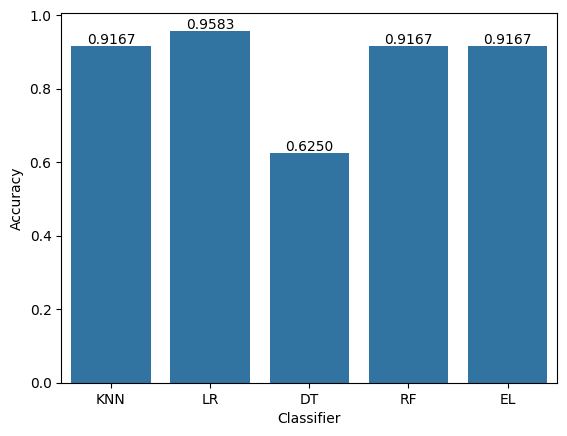

In [ ]:
import seaborn as sns
axis = sns.barplot(x = 'Name', y = 'Score', data =tr_split )
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center")

plt.show()

In [ ]:
#!pip install tensorflow
#import tensorflow as tf
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

# Initialize the model
#model = Sequential()

# Add layers
#model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Flatten())
#model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(10, activation='softmax'))

# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
#model.summary()


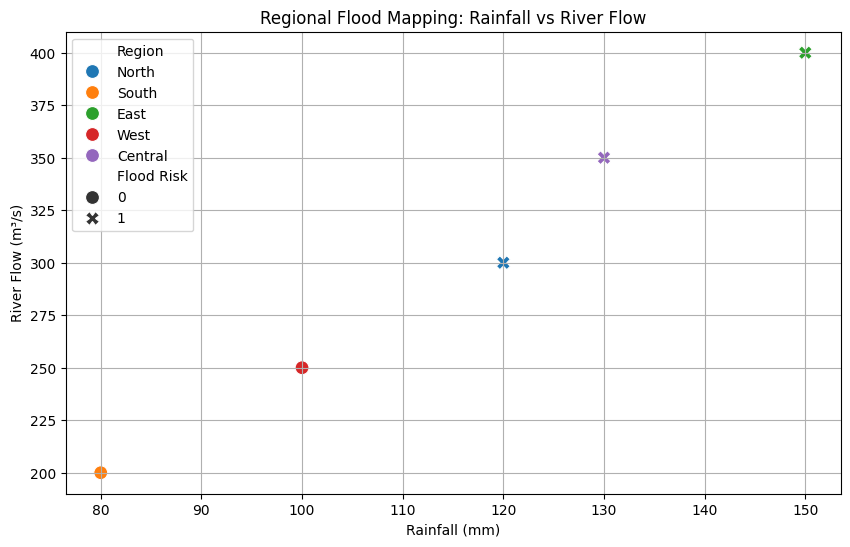

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'],
    'Rainfall (mm)': [120, 80, 150, 100, 130],
    'River Flow (m³/s)': [300, 200, 400, 250, 350],
    'Flood Risk': [1, 0, 1, 0, 1]  # 1 indicates high risk, 0 indicates low risk
}

df = pd.DataFrame(data)

# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rainfall (mm)', y='River Flow (m³/s)', hue='Region', style='Flood Risk', data=df, s=100)
plt.title('Regional Flood Mapping: Rainfall vs River Flow')
plt.xlabel('Rainfall (mm)')
plt.ylabel('River Flow (m³/s)')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


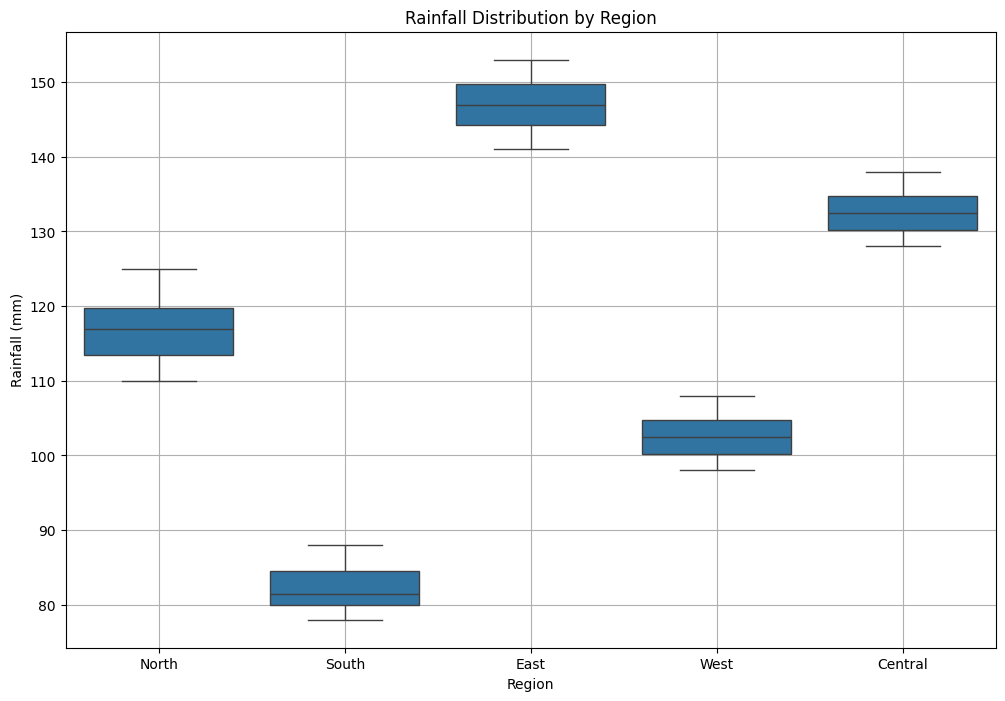

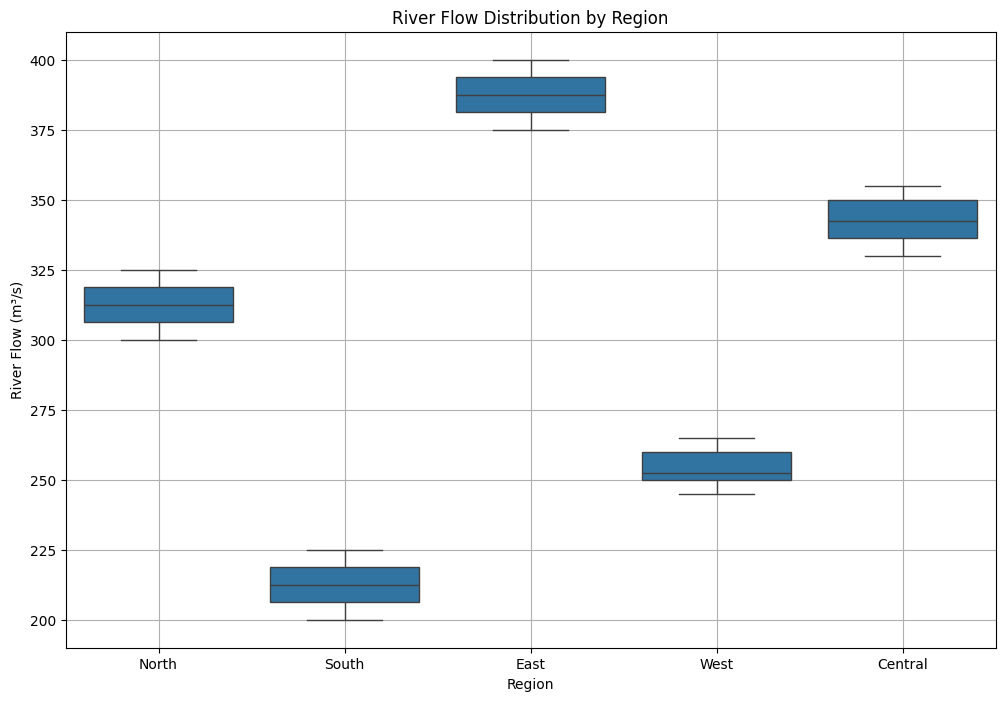

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dataset
data = {
    'Region': ['North', 'South', 'East', 'West', 'Central'] * 10,
    'Rainfall (mm)': [120, 80, 150, 100, 130, 115, 85, 145, 105, 135, 118, 82, 148, 102, 132, 110, 78, 142, 98, 128, 125, 88, 152, 108, 138, 112, 80, 146, 104, 134, 119, 83, 149, 103, 133, 116, 79, 141, 99, 129, 123, 86, 153, 107, 137, 113, 81, 144, 101, 131],
    'River Flow (m³/s)': [300, 200, 400, 250, 350, 310, 210, 390, 260, 340, 305, 205, 395, 255, 345, 320, 220, 380, 245, 335, 315, 215, 385, 265, 355, 325, 225, 375, 250, 330, 310, 210, 390, 260, 340, 300, 200, 400, 250, 350, 320, 220, 380, 245, 335, 315, 215, 385, 265, 355],
}

df = pd.DataFrame(data)

# Box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='Rainfall (mm)', data=df)
plt.title('Rainfall Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Rainfall (mm)')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='Region', y='River Flow (m³/s)', data=df)
plt.title('River Flow Distribution by Region')
plt.xlabel('Region')
plt.ylabel('River Flow (m³/s)')
plt.grid(True)
plt.show()
